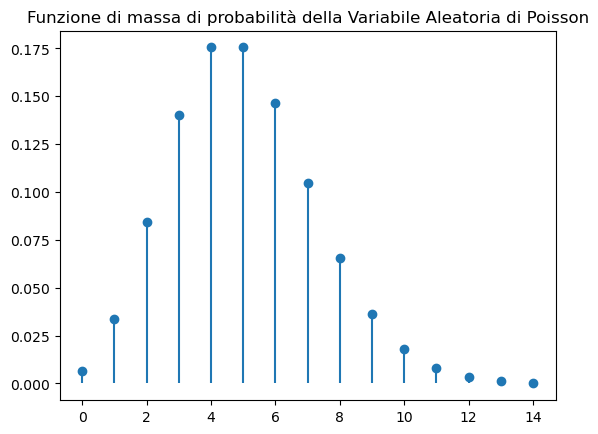

In [6]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np


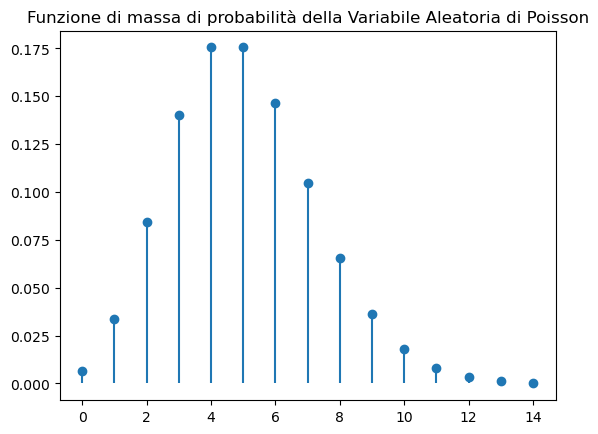

In [7]:
#ESERCIZIO 1

l = 5
x = range(15)
X = st.poisson(l)

plt.title('Funzione di massa di probabilità della Variabile Aleatoria di Poisson')
plt.vlines(x,0, X.pmf(x))
plt.plot(x, X.pmf(x), 'o')
plt.show()

In [4]:
1-X.cdf(6)

0.2378165370270613

In [5]:
X.ppf(0.8)

7.0

In [8]:
#ESERCIZIO 2

In [11]:
acqua = pd.read_csv('composizioneAcqua.csv', sep = ',', decimal = '.')
acqua

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1645,Sorgente5,4,5.601863
1646,Sorgente5,4,6.642368
1647,Sorgente5,6,3.134170
1648,Sorgente5,2,12.190175


In [12]:
#2.1 Quanti sono i casi presenti nel dataset?
len(acqua)

1650

In [13]:
#2.2 Quanti litri d'acqua sono stati analizzati complessivamente?
len(acqua)*5

8250

In [14]:
#2.3 Quante sono le sorgenti dalle quali sono stati prelevati i campioni d'acqua?
len(acqua['NomeSorgente'].unique())

5

In [22]:
#2.4 Le diverse sorgenti sono rappresentate in modo uniforme nel dataset?
#Usiamo l'indice di Gini normalizzato

def gini(series):
    return 1- sum(series.value_counts(normalize= True)
                        .map(lambda f: f**2))

def normalized_gini(series):
    s = len(series.unique())
    return s*gini(series) / (s-1)

print(normalized_gini(acqua['NomeSorgente']), 'indice di Gini prossimo ad 1 indica alta eterogeneità ed uniformità tra tutte le sorgenti')


0.980257116620753 indice di Gini prossimo ad 1 indica alta eterogeneità ed uniformità tra tutte le sorgenti


In [23]:
#2.5 Si calcoli la tabella delle frequenze delle particelle d'oro su 5 litri d'acqua
oro_abs = pd.crosstab(index= acqua['Oro'],
                     colnames = ['Frequenza assoluta'],
                     columns = [''])
oro_abs

Frequenza assoluta,
Oro,
0,456
1,489
2,328
3,143
4,80
5,63
6,48
7,20
8,12


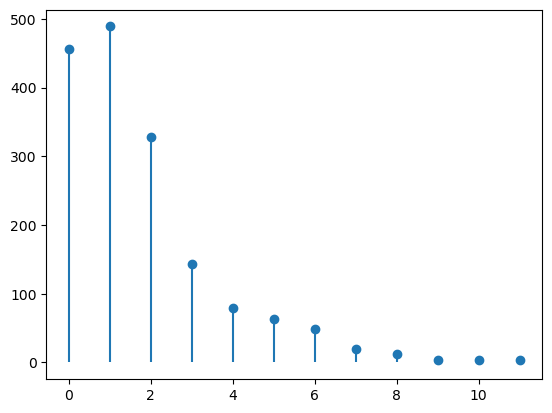

In [26]:
#2.6 Si tracci un grafico opportuno per visualizzare tali frequenze
plt.vlines(oro_abs.index, 0, oro_abs.values, )
plt.plot(oro_abs.index, oro_abs.values, 'o')
plt.show()

In [28]:
#2.7 La distribuzione delle frequenze osservata è compatibile con un modello di Poisson?
print('osservando il grafico delle frequenze, esso inizialmente cresce, raggiunge un punto di massimo e poi decresce, il che\nè compatibile con un modello di Poisson.')
print(acqua['Oro'].mean(), acqua['Oro'].var())
print('Tuttavia, i valori molto diversi di valore atteso e varianza confutano tale ipotesi, in quanto in un modello di Poisson\nquesti valori coincidono (o comunque sono molto simili).')

osservando il grafico delle frequenze, esso inizialmente cresce, raggiunge un punto di massimo e poi decresce, il che
è compatibile con un modello di Poisson.
1.7224242424242424 3.4025896319164715
Tuttavia, i valori molto diversi di valore atteso e varianza confutano tale ipotesi, in quanto in un modello di Poisson
questi valori coincidono (o comunque sono molto simili).


In [29]:
#2.8 Si stimi il numero atteso di particelle d'oro riscontrate in 5 litri d'acqua
acqua['Oro'].mean()

1.7224242424242424

In [30]:
'''
2.9 Sia X la variabile casuale che conta il numero di particelle di oro riscontrate in 5 litri di acqua. Scrivere lo 
stimatore utilizzato al punto precedente, specificare la numerosità del campione a cui è applicato e dire se è uno 
stimatore non distorto.
'''
print('Lo stimatore usato al punto precedente è la media campionaria, la quale è sempre uno stimatore non distorto per il \nvalore atteso della popolazione')

Lo stimatore usato al punto precedente è la media campionaria, la quale è sempre uno stimatore non distorto per il 
valore atteso della popolazione


In [31]:
#ESERCIZIO 3

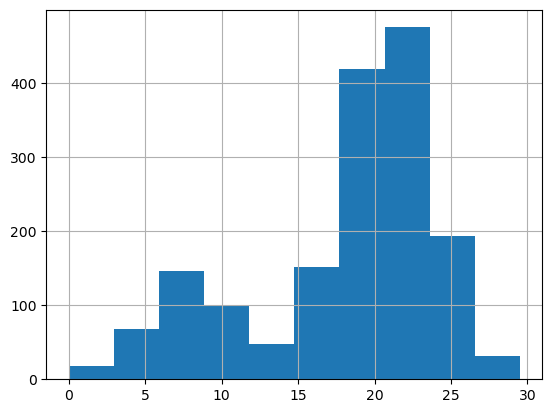

In [39]:
#3.1 Tracciare un grafico opportuno per la durezza dell'acqua
acqua['DurezzaAcqua']

acqua['DurezzaAcqua'].hist()
plt.show()

Osservando il grafico, si nota come esso assume una forma bimodale, che non caratterizza il modello normale. Possiamo
usare un QQ-plot per confermare tale ipotesi:


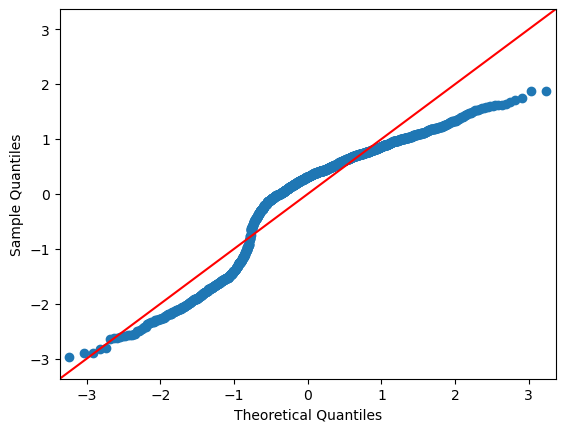

Il QQ-plot evidenza come le misurazioni si discostano abbastanza dalla linea rossa, per cui possiamo confermare che la
durezza dell acqua non assume una distribuzione normale


In [42]:
#3.2 La distribuzione osservata al punto 3.1 è compatibile con un modello normale?
print('Osservando il grafico, si nota come esso assume una forma bimodale, che non caratterizza il modello normale. Possiamo\nusare un QQ-plot per confermare tale ipotesi:')
sm.qqplot(acqua['DurezzaAcqua'], fit = True, line = '45')
plt.show()
print('Il QQ-plot evidenza come le misurazioni si discostano abbastanza dalla linea rossa, per cui possiamo confermare che la\ndurezza dell acqua non assume una distribuzione normale')

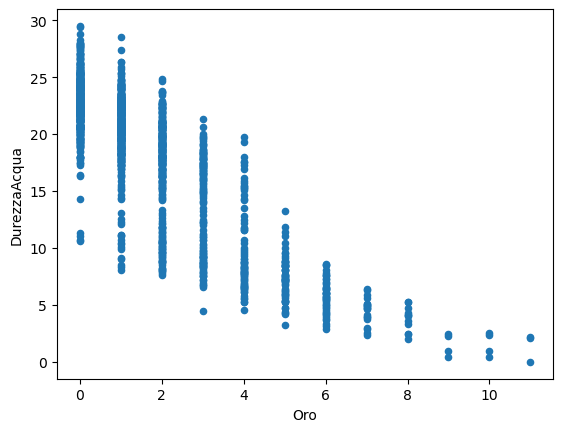

Lo scatter plot evidenzia una relazione di tipo indiretto tra i due attributi
-0.8427686305078547
indice di correlazione prossimo a -1 conferma tale ipotesi


In [45]:
'''
3.3 L'ufficio analisi chimiche ipotizza che ci sia una relazione tra la quantità di oro riscontrata e la durezza dell'acqua. 
Si produca un grafico e si calcoli un indice numerico per convincere il titolare della ditta che l'ipotesi è accettabile.
'''
acqua.plot.scatter('Oro', 'DurezzaAcqua')
plt.show()
print('Lo scatter plot evidenzia una relazione di tipo indiretto tra i due attributi')
print(acqua['Oro'].corr(acqua['DurezzaAcqua']))
print('Indice di correlazione prossimo a -1 conferma tale ipotesi')

In [46]:
'''
3.5 Osservando i grafici prodotti nei primi due punti di questo esercizio, ai chimici viene il sospetto che non tutte le 
sorgenti siano caratterizzate dalla stessa durezza media dell'acqua, e in particolare che nel dataset ci siano due gruppi 
distinti dal punto di vista della durezza dell'acqua. Si valuti se questa ipotesi è condivisibile.
'''
print('istogramma con una forma a doppia campana conferma tale ipotesi')

istogramma con una forma a doppia campana conferma tale ipotesi


In [49]:
#3.6 Calcolare la durezza media dell'acqua per ogni sorgente del dataset
acqua.groupby('NomeSorgente').mean()

,Oro,DurezzaAcqua
NomeSorgente,,
Sorgente1,0.970000,21.009675
Sorgente2,1.048000,20.836725
Sorgente3,1.120000,20.696062
Sorgente4,1.068000,20.917371
Sorgente5,4.228571,7.754144


In [52]:
'''
3.7 Dal punto precedente dovrebbe essere emerso che la sorgente 5 presenta una durezza dell'acqua nettamente inferiore a 
quella delle altre sorgenti, le quali invece hanno una durezza media abbastanza simile. Selezionate e memorizzate nella 
variabile sorgente_5 gli attributi Oro e DurezzaAcqua soltanto della sorgente 5; selezionate e memorizzate nella variabile 
altre_sorgenti i medesimi attributi per tutte le altre sorgenti.
'''

sorgente_5 = acqua[acqua['NomeSorgente'] == 'Sorgente5']
altre_sorgenti = acqua[acqua['NomeSorgente'] != 'Sorgente5']

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1295,Sorgente4,2,16.587424
1296,Sorgente4,0,22.519519
1297,Sorgente4,4,15.428171
1298,Sorgente4,0,27.437145


In [54]:
#3.8 Stimare il numero atteso di particelle d'oro trovate in 5 litri d'acqua nel caso della sorgente 5 e per tutte le altre
print('Sorgente 5:', sorgente_5['Oro'].mean())
print('Altre sorgenti:', altre_sorgenti['Oro'].mean())

Sorgente 5: 4.228571428571429
Altre sorgenti: 1.0476923076923077


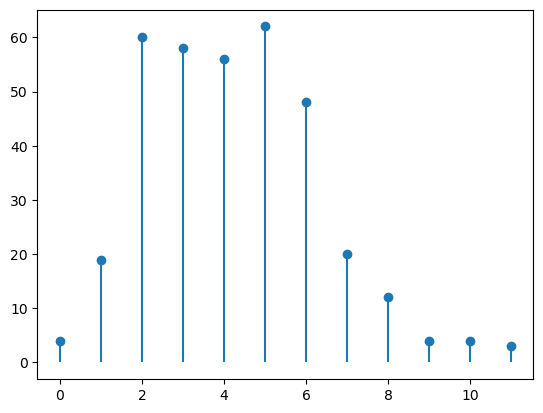

Osservando il grafico si vede come esso cresce, poi decresce, per poi raggiungere un massimo e decrescere. Tale
andamento è compatibile con un modello di Poisson.
4.228571428571429 4.38886614817847
I valori molto simili di valore atteso e varianza confermano tale ipotesi.


In [59]:
#3.9 La distribuzione delle frequenze osservate per la sorgente 5 è compatibilie con un modello di Poisson?
oro5_abs = pd.crosstab(index= sorgente_5['Oro'],
                     colnames = ['Frequenza assoluta'],
                     columns = [''])
plt.vlines(oro5_abs.index, 0, oro5_abs.values, )
plt.plot(oro5_abs.index, oro5_abs.values, 'o')
plt.show()
print('Osservando il grafico si vede come esso cresce, poi decresce, per poi raggiungere un massimo e decrescere. Tale\nandamento è compatibile con un modello di Poisson.')
print(sorgente_5['Oro'].mean(), sorgente_5['Oro'].var())
print('I valori molto simili di valore atteso e varianza confermano tale ipotesi.')